In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [15]:
df = pd.read_csv("spam mail.csv")
print(df)
df.isna().sum()

     Category                                           Masseges
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ì_ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


Category    0
Masseges    0
dtype: int64

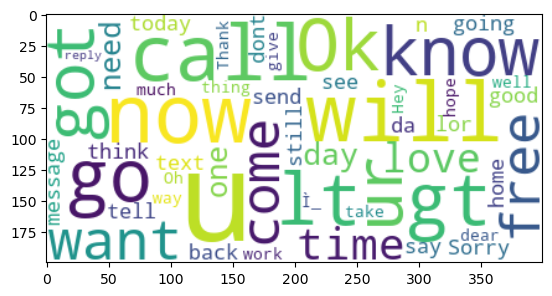

In [16]:
#Untuk membuat word cloud, gabisa langsung dari DF. Jadiin satu semua string di column message.
text = ' '.join(df['Masseges'].tolist())

wordcloud  = WordCloud(background_color='white', colormap='viridis', contour_color='steelblue', max_words=50).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

<Axes: xlabel='Category'>

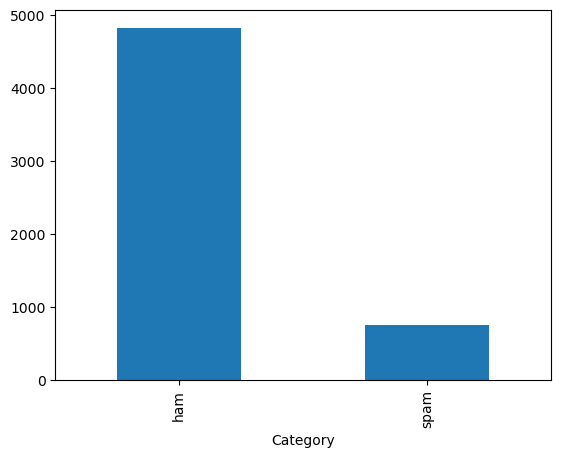

In [17]:
df.Category.value_counts().plot.bar()

In [18]:
df.groupby(['Category']).count()

,Masseges
Category,
ham,4825
spam,747


In [19]:
from sklearn.model_selection import train_test_split

df["Category"] = df['Category'].astype("category").cat.codes
df.head()

,Category,Masseges
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#Menggunakan Recurrent Neural Network (RNN)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
X = df['Masseges'].values
y = df['Category'].values

#Mengubah string menjadi numerical karena masuk model harus numerical
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

#Padding agar data menjadi seragam
X = pad_sequences(X, maxlen=50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

embedding_dim = 128
model = Sequential()

In [22]:
#Membuat embedding layer untuk mengubah tokenized integers menjadi dense vector
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))

#LSTM layer (Long short term memory)
model.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))

#Dense layer
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

d:\OOP\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [24]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8891 - loss: 0.3673 - val_accuracy: 0.9794 - val_loss: 0.0791
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9865 - loss: 0.0464 - val_accuracy: 0.9848 - val_loss: 0.0563
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9950 - loss: 0.0206 - val_accuracy: 0.9848 - val_loss: 0.0527
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9967 - loss: 0.0145 - val_accuracy: 0.9830 - val_loss: 0.0590
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9857 - val_loss: 0.0625
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9999 - loss: 0.0023 - val_accuracy: 0.9839 - val_loss: 0.0730
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9821 - val_loss: 0.0873
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9996 - loss: 0.0010 - val_accuracy: 0.9821 - v

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: ", accuracy)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0634
Test Accuracy:  0.9829596281051636


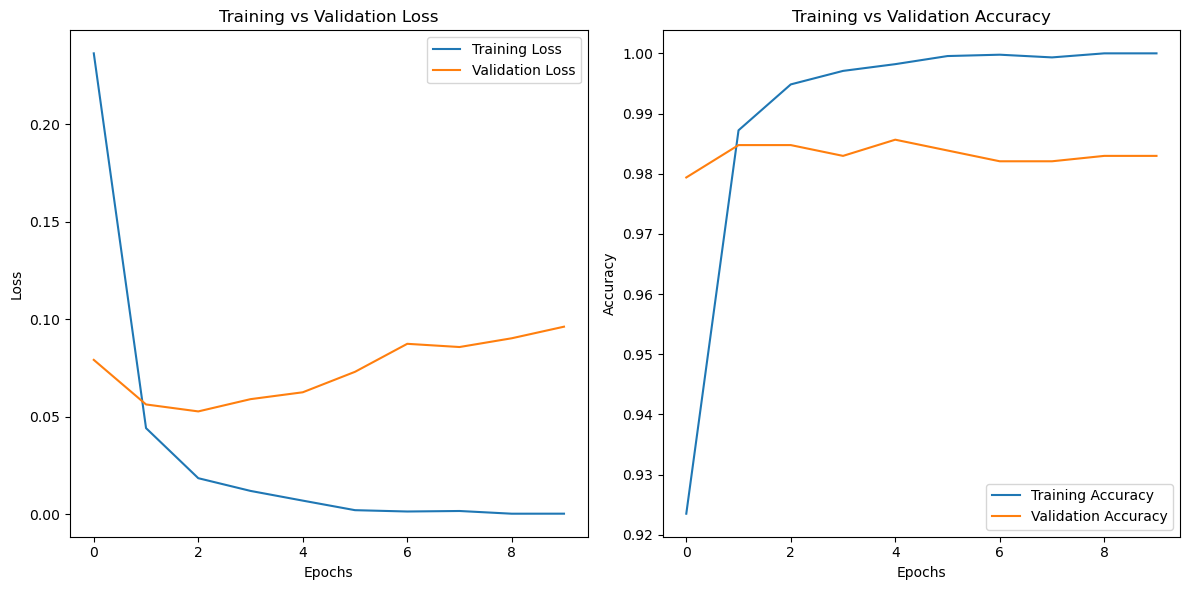

In [26]:
# Extracting loss and accuracy
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
